In [1]:
%matplotlib inline
%load_ext autotime
%load_ext snakeviz
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import datetime as dt
from SIR_models import *
import datetime as dt

yellow = (240/255, 203/255, 105/255)
grey = (153/255, 153/255, 153/255)
faded_grey = (153/255, 153/255, 153/255, .25)
red = (220/255, 83/255, 86/255)


smallfigsize=(6.5,3.5)
#smallfigsize=(15.0,8.0)
midfigsize=(16.0 ,3.5)
bigfigsize=(16, 7)

cut_sample_date = None

# Case Study for Spain, South Korea, US, Italy and Brazil

## Scenario creation

Let's take a look at total confirmed cases in late cycle examples

In [2]:
dic = {}

countries_list = [
    'Diamond Princess',
    'Korea, South',
    'Italy',
    'Spain',
    'New Zealand',
    'Singapore',
    'Germany',
    'Thailand',
    'Japan',
    'US',
    'Brazil',
]

for ct in countries_list:
    d = SIR(country=ct)
    dic[ct] = d.confirmed.max() / d.country_population


time: 857 ms


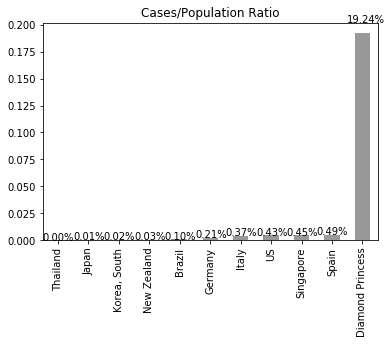

time: 166 ms


In [3]:
df = pd.Series(dic)
df.sort_values(inplace=True)
ax = df.plot.bar(color=grey, title='Cases/Population Ratio')

for i, each in enumerate(df.index):
    #for col in df.columns:
    y = df.loc[each]
    text = "{:.2%}".format(df.loc[each])
    ax.text(i-.5, y*1.05, text)

In [4]:
for ct in countries_list:
    d = SIR(country=ct)
    dic[ct] = d.confirmed.index[0]

time: 795 ms


In [5]:
df = pd.Series(dic)
df.sort_values(inplace=True)

df

Diamond Princess   2020-02-10
Korea, South       2020-02-20
Japan              2020-02-21
Italy              2020-02-23
Singapore          2020-02-29
Germany            2020-03-01
Spain              2020-03-02
US                 2020-03-03
Brazil             2020-03-13
Thailand           2020-03-15
New Zealand        2020-03-22
dtype: datetime64[ns]

time: 3.99 ms


In [6]:
pd.DataFrame(pd.Series(dic).describe()).T

,count,unique,top,freq,first,last
0,11,11,2020-03-13,1,2020-02-10,2020-03-22


time: 18 ms


The confirmed cases, so far, typically, are ranging from 0.01% to 0.5%, with the exception of the diamond princess.

The most open range would be 0.01%-20%. We would be confortable using a range starting at the minimum value to at least 3-5 times the max value ex-DP

# South Korea

We know that South Korea has extensively tested the population, so that its confirmed cases are more reasonable. Thus we are confortable using the confirmed cases as well to fit the model

S0p: 0.00030112224295866796
gamma_i: 0.24999999999999983
gamma_h: 0.034756283311904494
omega: 0.2
beta: 0.35468774551831705
delta: 0.47878787878787876
S0: 15329.941981862894
R0:1.4584580945567704
gamma_i: 4.000000000000003 days
gamma_h: 28.771776056316313 days
omega: 5.0 days
{'S0p': (0.0001, 0.02), 'gamma_i': (0.07142857142857142, 0.25), 'gamma_h': (0.02197802197802198, 0.05714285714285714), 'omega': (0.047619047619047616, 0.2), 'beta': (0.01, 0.5), 'delta': (0, 0.47878787878787876)}

I Max:
1100.7112670892247
Est:
165.1066900633837
H Max:
139.66818259564064
R Max:
10228.9731648699
F Max:
251.50200096007956
F+R Max:
10480.47516582998


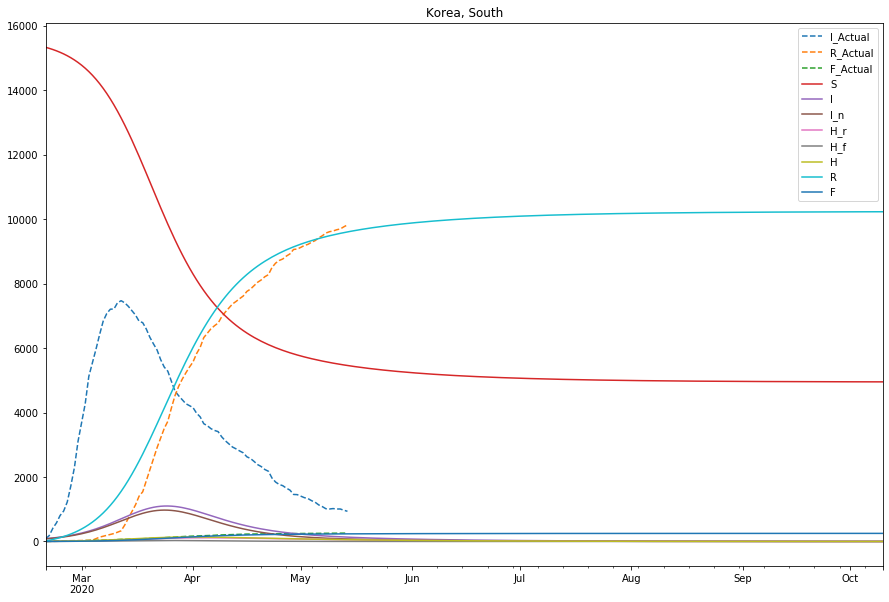

time: 3.48 s


In [7]:
hospRate = 0.05
deltaUpperBound = 79/165

t1 = SIRFH(country = 'Korea, South',
        #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.00,0.00,.998],
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .05,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             #'lambda': 0.5,
             
             
         },
                   
         parameter_bounds = {
             'S0p': (.0001, .02),
         #    'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6.5*7), 1/(2.5*7)),
             'omega': (1/(21), 1/(5)),
         #    'lambda': (.5,2)
             
         },
         
         constraints_bounds = {
             'R0': (1,6),
         },
           
         cut_sample_date = cut_sample_date
                   
         )

#t1.train_S0()
t1.train()
#t1.train_S0_joint()

#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}
print(t1.parameter_bounds)

print('\nI Max:')
print(t1.df.I.max())
print('Est:')
print(t1.df.I.max()*.15)
print('H Max:')
print(t1.df['H'].max())
print('R Max:')
print(t1.df['R'].max())
print('F Max:')
print(t1.df['F'].max())
print('F+R Max:')
print(t1.df['F'].max()+t1.df['R'].max())

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.main_plot()

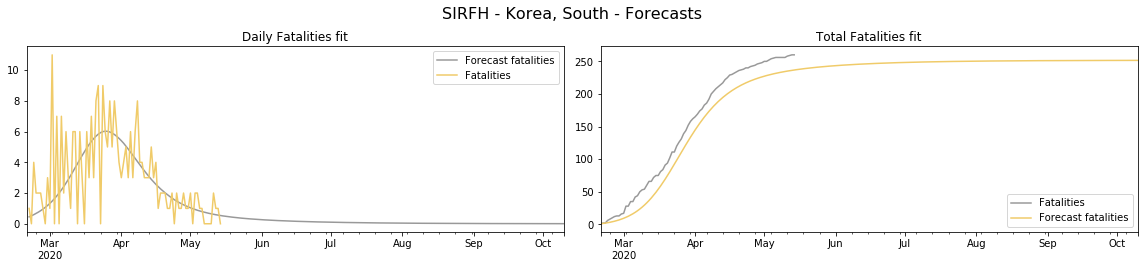

time: 999 ms


In [8]:
t1.plot_main_forecasts(figsize=midfigsize)

[0.00024089779436693438, 0.00030112224295866796, 0.00036134669155040154]


True

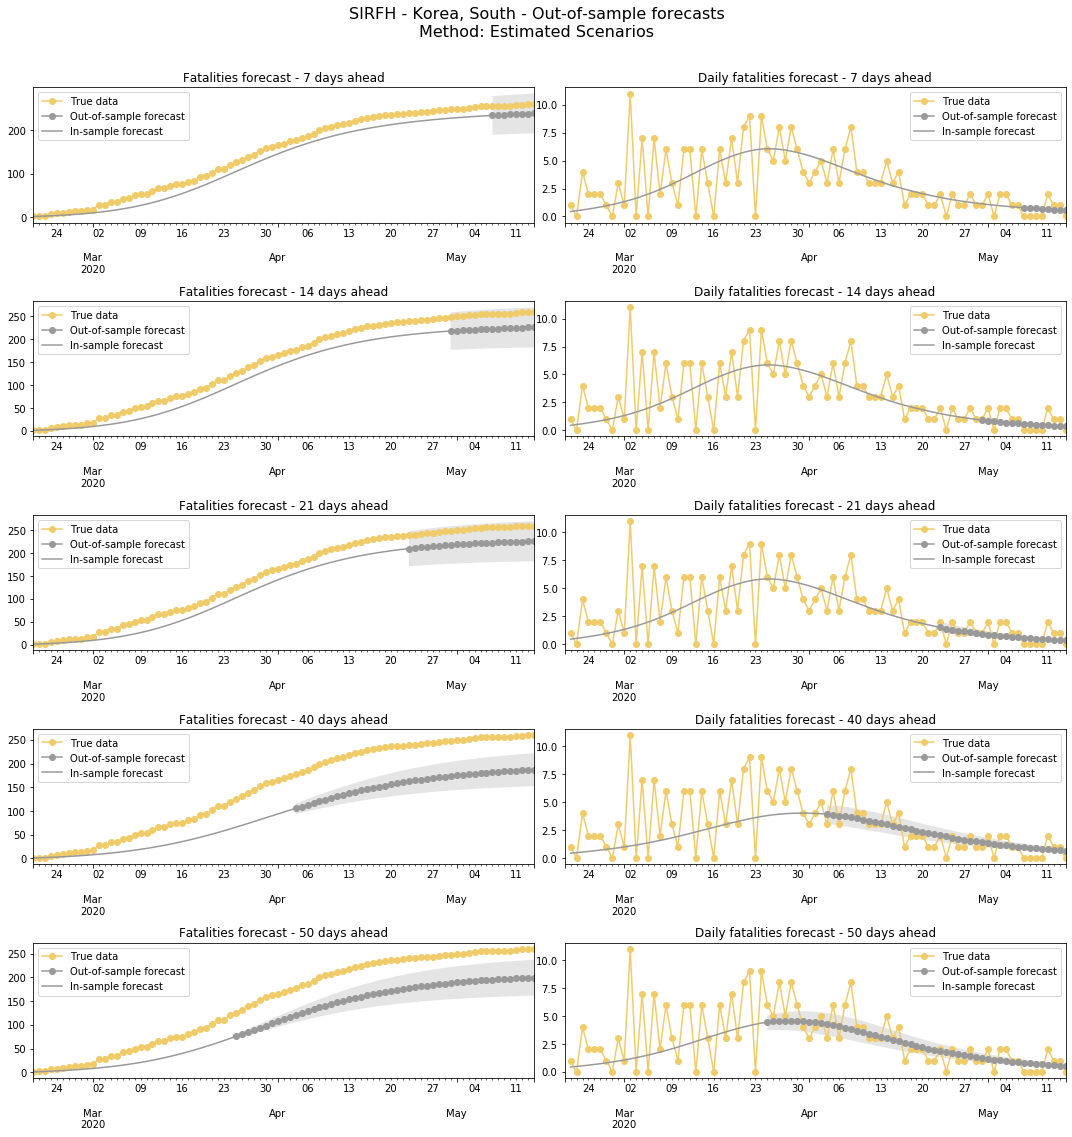

time: 31.5 s


In [9]:
#t1.outOfSample_forecast_scenarios(days=[7, 14, 21, 45, 60], scenarios='estimate', figsize=(15,15))
#t1.outOfSample_forecast_scenarios(days=[7, 14, 21,], scenarios='estimate', figsize=(15,10))
t1.outOfSample_forecast_scenarios(days=[7, 14, 21, 40, 50], scenarios='estimate', figsize=(15,15))

[0.00024089779436693438, 0.00030112224295866796, 0.00036134669155040154]


True

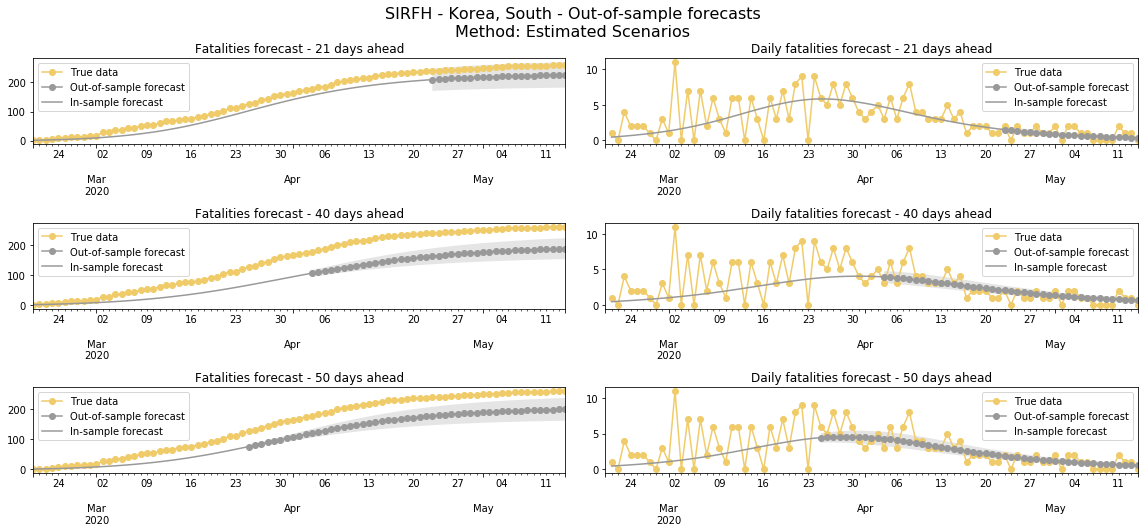

time: 19.4 s


In [10]:
#t1.outOfSample_forecast_scenarios(days=[7, 14, 21, 45, 60], scenarios='estimate', figsize=(15,15))
#t1.outOfSample_forecast_scenarios(days=[7, 14, 21,], scenarios='estimate', figsize=(15,10))
t1.outOfSample_forecast_scenarios(days=[21, 40, 50], scenarios='estimate', figsize=bigfigsize)

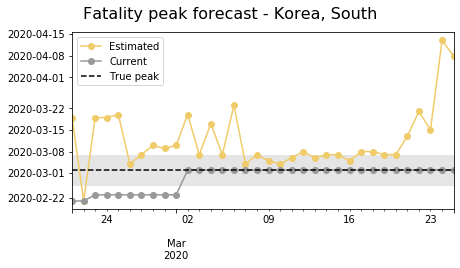

time: 2min 13s


In [11]:
roll = t1.rolling_peak(figsize=smallfigsize)

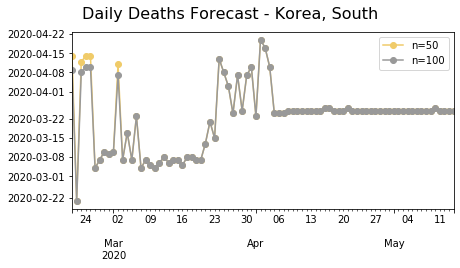

time: 2min 30s


In [12]:
nd = t1.rolling_n_fatal(figsize=smallfigsize)

## Italy

S0p: 0.02
gamma_i: 0.07142895075862914
gamma_h: 0.021978569309557664
omega: 0.048481763839399526
delta: 0.4787811063830613
lambda: 3.270966243438047
beta1: 0.41759190843628347
beta2: 0.27619436976412776
S0: 1209074.02
R0:{'R0_initial': 6.00066890475512, 'R0_final': 3.9688292153891656}
gamma_i: 13.999925651703524 days
gamma_h: 45.49886691510612 days
omega: 20.62631226274266 days
{'S0p': (0.005, 0.02), 'gamma_i': (0.07142857142857142, 0.25), 'gamma_h': (0.02197802197802198, 0.05714285714285714), 'omega': (0.047619047619047616, 0.2), 'delta': (0, 0.47878787878787876), 'lambda': (0.25, 4), 'beta1': (0.05, 0.5), 'beta2': (0.05, 0.5)}

I Max:
580797.6622513607
Est:
87119.6493377041
H Max:
37610.47588578283
R Max:
1166014.5217124443
F Max:
28607.7253043085
F+R Max:
1194622.2470167528


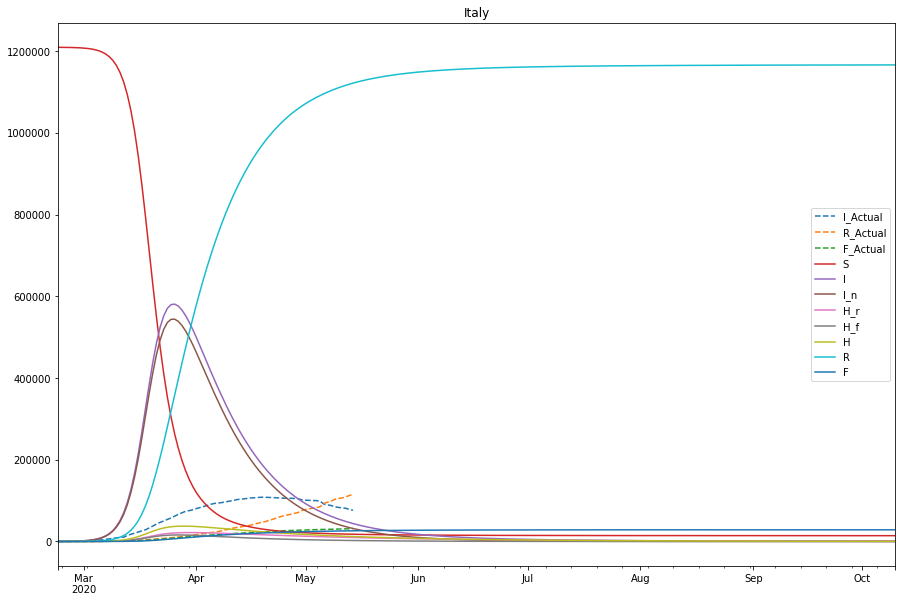

time: 1.9 s


In [13]:
hospRate = 0.05
deltaUpperBound = 79/165

t1 = SIRFH_Sigmoid(country = 'Italy',
         #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.00,0.00,1],
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .05,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             #'lambda': 0.5,
             
             
         },
                   
         parameter_bounds = {
             'S0p': (.005, .02),
         #    'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6.5*7), 1/(2.5*7)),
             'omega': (1/(21), 1/(5)),
         #    'lambda': (.5,2)
             
         },
         
         constraints_bounds = {
             'R0': (1,6),
         },
                   
         cut_sample_date = cut_sample_date
                   
         )

#t1.train_S0()
t1.train()
#t1.train_S0_joint()

#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}
print(t1.parameter_bounds)

print('\nI Max:')
print(t1.df.I.max())
print('Est:')
print(t1.df.I.max()*.15)
print('H Max:')
print(t1.df['H'].max())
print('R Max:')
print(t1.df['R'].max())
print('F Max:')
print(t1.df['F'].max())
print('F+R Max:')
print(t1.df['F'].max()+t1.df['R'].max())

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.main_plot()

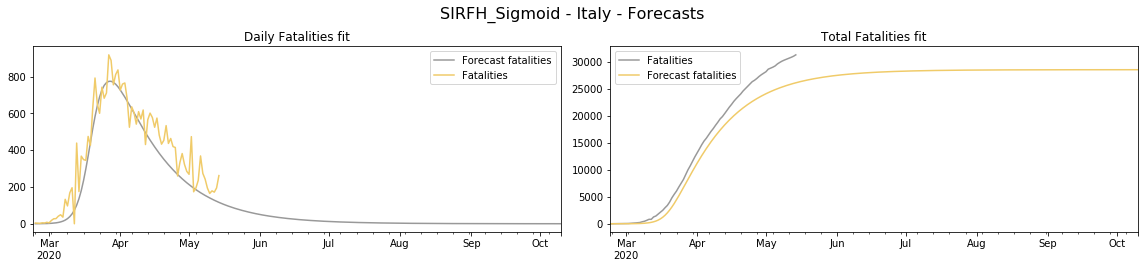

time: 888 ms


In [14]:
t1.plot_main_forecasts(figsize=midfigsize)

[0.015, 0.02, 0.025]


True

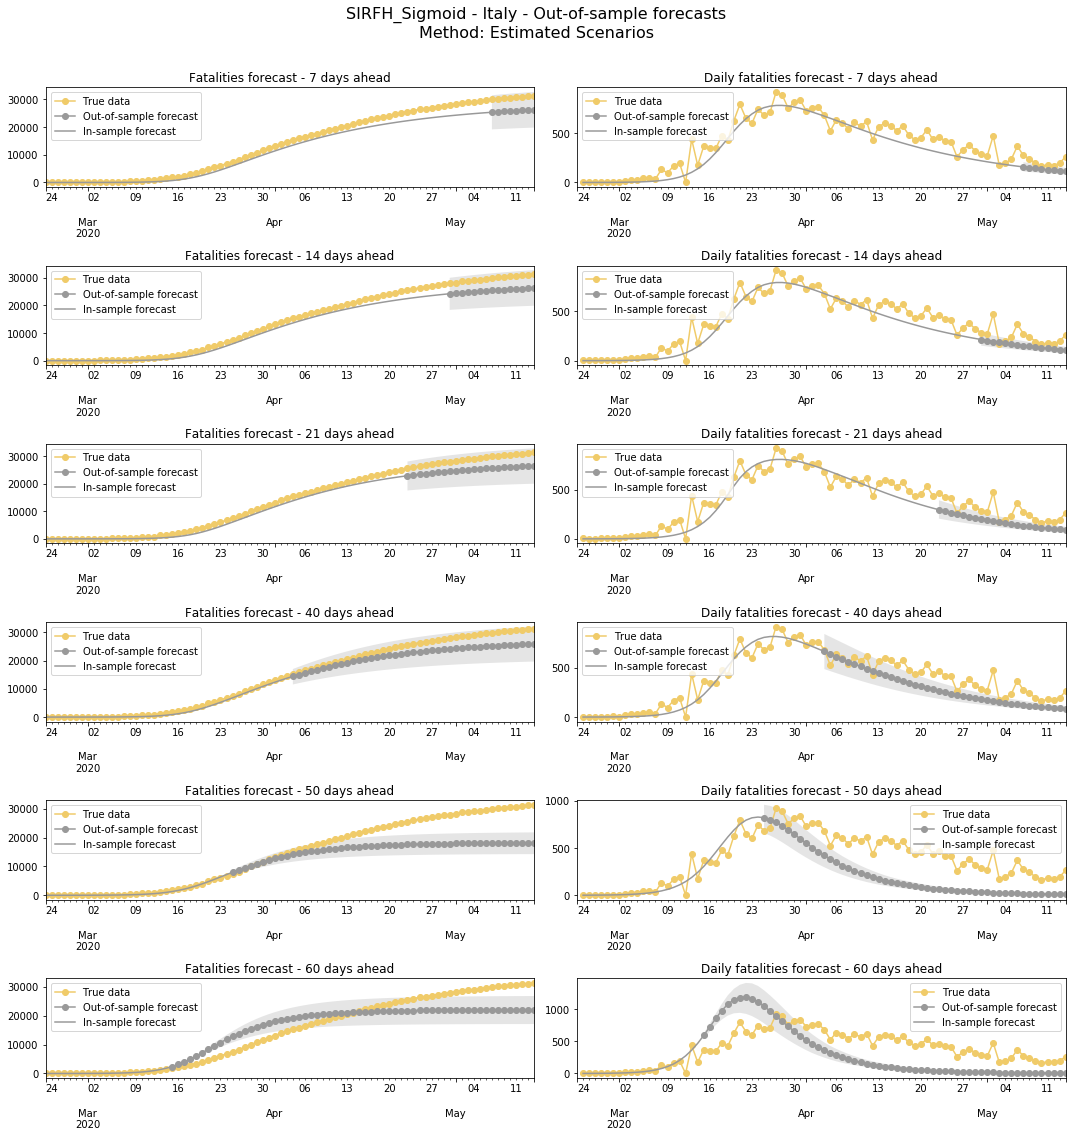

time: 44.3 s


In [15]:
#t1.outOfSample_forecast_scenarios(days=[7, 14, 21], scenarios='estimate')
t1.outOfSample_forecast_scenarios(days=[7, 14, 21, 40, 50, 60], scenarios='estimate', figsize=(15,15))

[0.015, 0.02, 0.025]


True

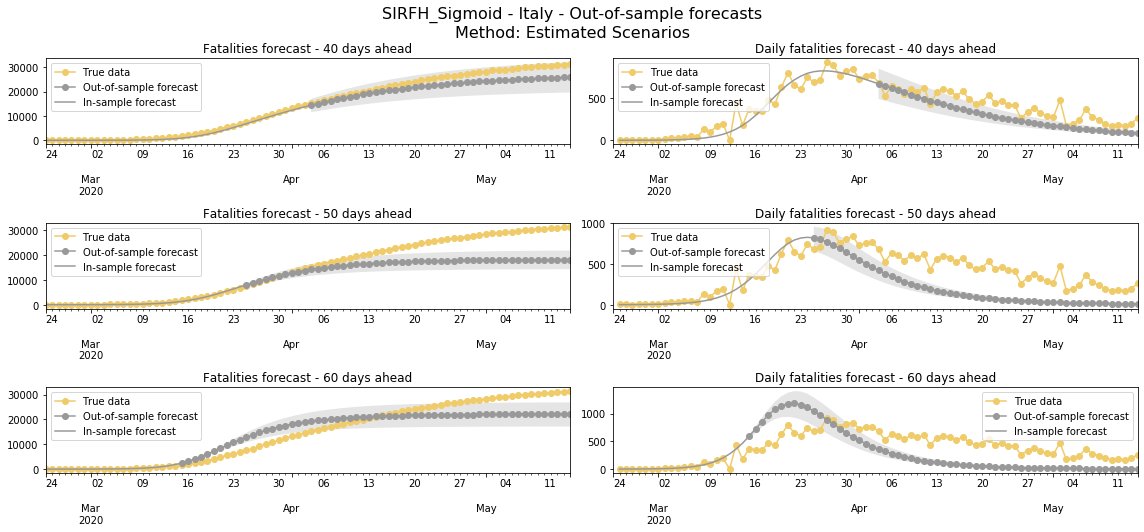

time: 24.7 s


In [16]:
t1.outOfSample_forecast_scenarios(days=[40, 50, 60], scenarios='estimate', figsize=bigfigsize)

C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']


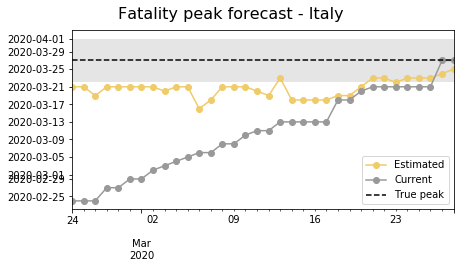

time: 2min 38s


In [17]:
roll = t1.rolling_peak(figsize=smallfigsize)

C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']


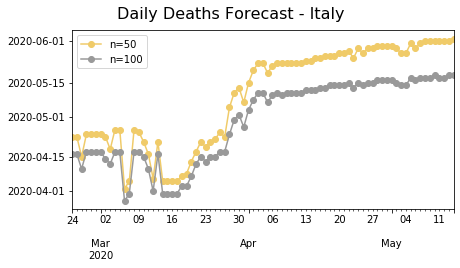

time: 2min 39s


In [18]:
nd = t1.rolling_n_fatal(figsize=smallfigsize)

## Spain

S0p: 0.02
gamma_i: 0.07142857142857142
gamma_h: 0.0224753629961238
omega: 0.07828926122241443
delta: 0.4787878743513252
lambda: 0.33541267395641916
beta1: 0.42194383151748255
beta2: 0.4219365379790716
S0: 934970.7266666667
R0:{'R0_initial': 6.000589617474977, 'R0_final': 6.000485893880521}
gamma_i: 14.0 days
gamma_h: 44.49316347738029 days
omega: 12.77314390742644 days
{'S0p': (0.005, 0.02), 'gamma_i': (0.07142857142857142, 0.25), 'gamma_h': (0.02197802197802198, 0.05714285714285714), 'omega': (0.047619047619047616, 0.2), 'delta': (0, 0.47878787878787876), 'lambda': (0.25, 4), 'beta1': (0.05, 0.5), 'beta2': (0.05, 0.5)}

I Max:
501393.05115036585
Est:
75208.95767255487
H Max:
29224.300591717605
R Max:
910560.2581937367
F Max:
22339.784262565172
F+R Max:
932900.0424563019


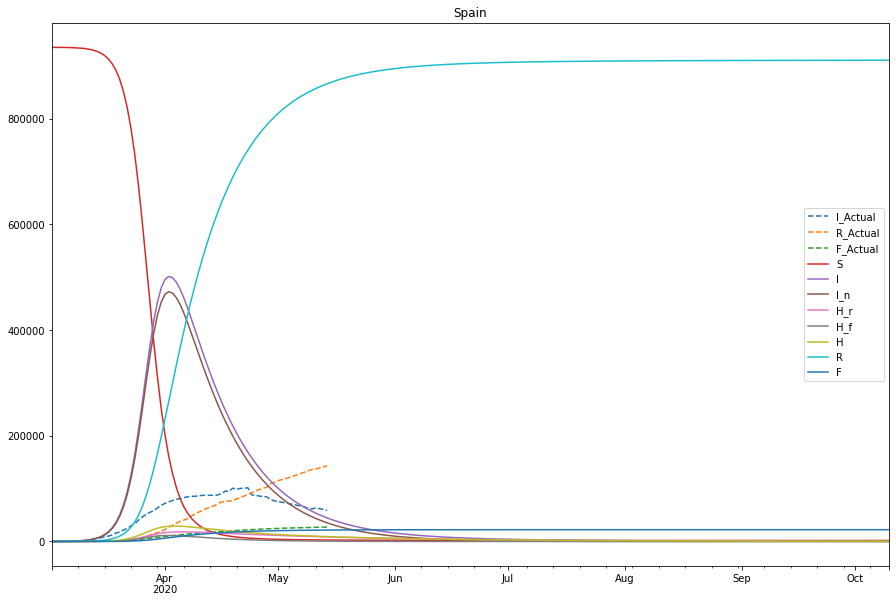

time: 4.03 s


In [19]:
hospRate = 0.05
deltaUpperBound = 79/165

t1 = SIRFH_Sigmoid(country = 'Spain',
         #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.000,.000,.9998],
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .02,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             #'lambda': 0.5,
             
             
         },
                   
         parameter_bounds = {
             'S0p': (.005, .02),
         #    'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6.5*7), 1/(2.5*7)),
             'omega': (1/(21), 1/(5)),
         #    'lambda': (.5,2)
             
         },
         
         constraints_bounds = {
             'R0': (1,6),
         },
                   
         cut_sample_date = cut_sample_date
                
                   
         )

#t1.train_S0()
t1.train()
#t1.train_S0_joint()

#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}
print(t1.parameter_bounds)

print('\nI Max:')
print(t1.df.I.max())
print('Est:')
print(t1.df.I.max()*.15)
print('H Max:')
print(t1.df['H'].max())
print('R Max:')
print(t1.df['R'].max())
print('F Max:')
print(t1.df['F'].max())
print('F+R Max:')
print(t1.df['F'].max()+t1.df['R'].max())

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.main_plot()

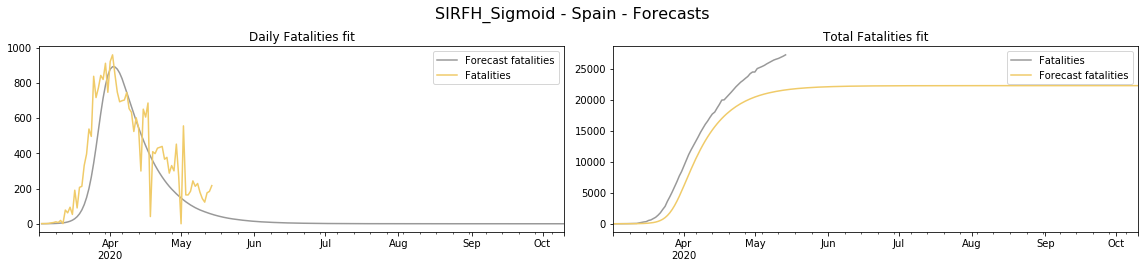

time: 838 ms


In [20]:
t1.plot_main_forecasts(figsize=midfigsize)

[0.015, 0.02, 0.025]


C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']
C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']


True

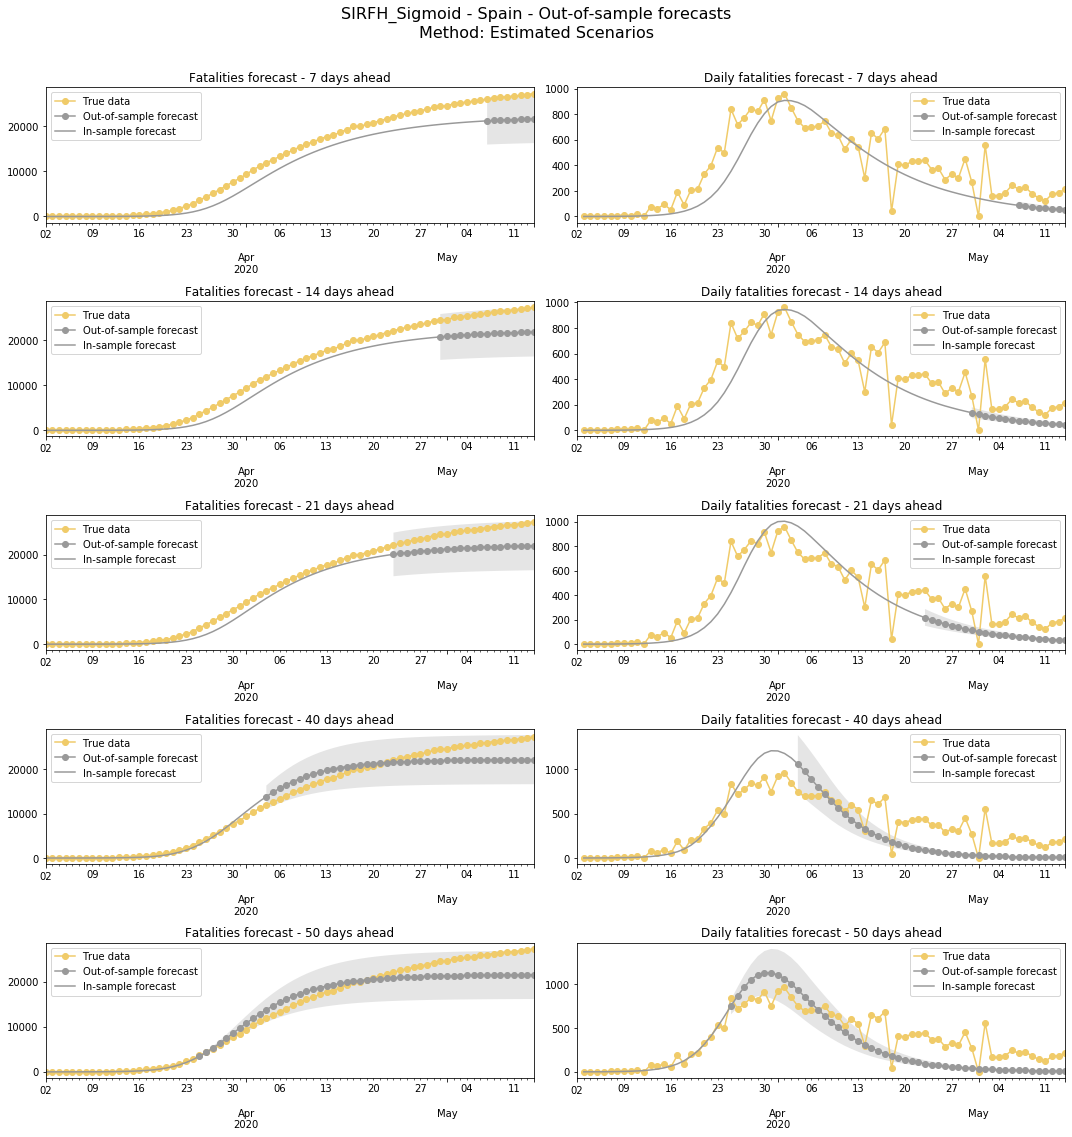

time: 1min 14s


In [21]:
#t1.outOfSample_forecast_scenarios(days=[7, 14, 21], scenarios='estimate')
t1.outOfSample_forecast_scenarios(days=[7, 14, 21, 40, 50], scenarios='estimate', figsize=(15,15))

[0.015, 0.02, 0.025]


C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']
C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']


True

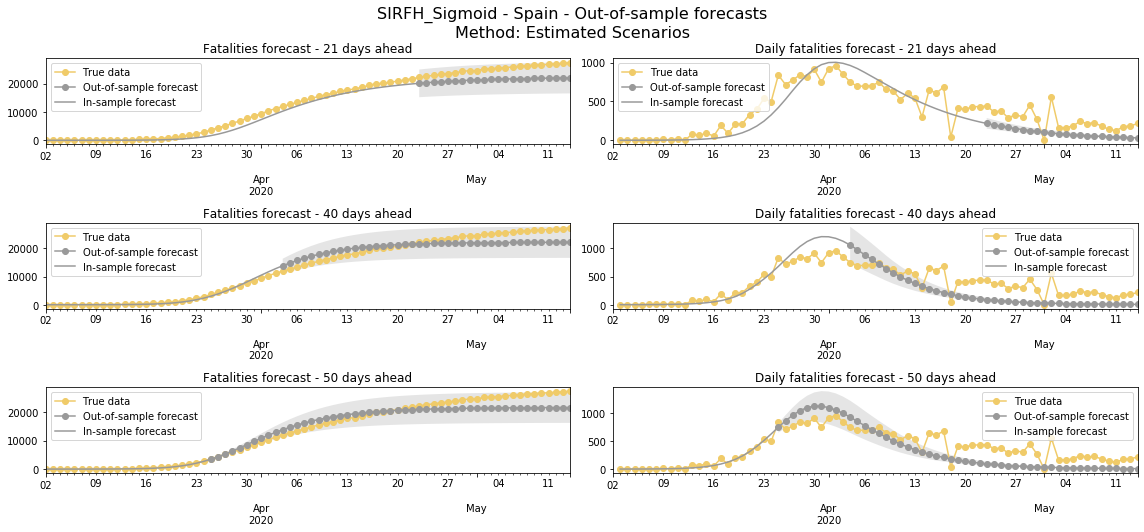

time: 36.8 s


In [22]:
t1.outOfSample_forecast_scenarios(days=[21, 40, 50,], scenarios='estimate',figsize=bigfigsize)

C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']


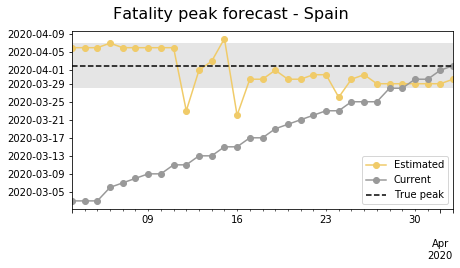

time: 3min 59s


In [23]:
roll = t1.rolling_peak(figsize=smallfigsize)

C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']


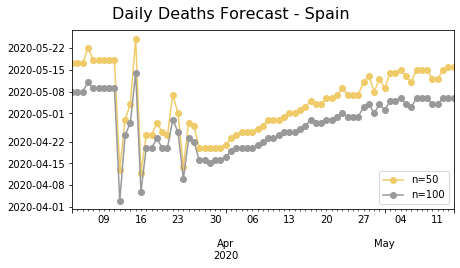

time: 3min 45s


In [24]:
nd = t1.rolling_n_fatal(figsize=smallfigsize)

## Germany

S0p: 0.012075087727564023
gamma_i: 0.24972755823276543
gamma_h: 0.057142830709373094
omega: 0.04761907330228567
delta: 0.21618848033397323
lambda: 0.9994523332507551
beta1: 0.4958223378445368
beta2: 0.49575154285656964
S0: 1011562.7685611359
R0:{'R0_initial': 2.065966216060761, 'R0_final': 2.065671231260273}
gamma_i: 4.004363823827255 days
gamma_h: 17.500008095258234 days
omega: 20.99998867369813 days
{'S0p': (0.005, 0.02), 'gamma_i': (0.07142857142857142, 0.25), 'gamma_h': (0.02197802197802198, 0.05714285714285714), 'omega': (0.047619047619047616, 0.2), 'delta': (0, 0.47878787878787876), 'lambda': (0.25, 4), 'beta1': (0.05, 0.5), 'beta2': (0.05, 0.5)}

I Max:
178666.87129259793
Est:
26800.03069388969
H Max:
21454.720796187692
R Max:
866702.3118222936
F Max:
9470.349308946037
F+R Max:
876172.6611312396


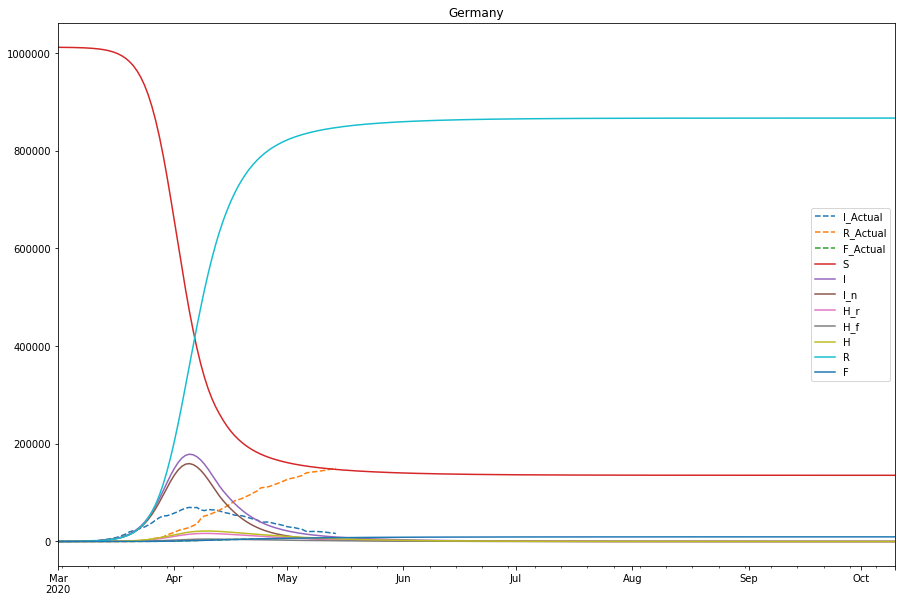

time: 3.42 s


In [43]:
hospRate = 0.05
deltaUpperBound = 79/165

t1 = SIRFH_Sigmoid(country = 'Germany',
         #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.000,.000,.9998],
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .02,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             #'lambda': 0.5,
             
             
         },
                   
         parameter_bounds = {
             'S0p': (.005, .02),
         #    'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6.5*7), 1/(2.5*7)),
             'omega': (1/(21), 1/(5)),
         #    'lambda': (.5,2)
             
         },
         
         constraints_bounds = {
             'R0': (1,6),
         },
                   
         cut_sample_date = cut_sample_date
                   
         )

#t1.train_S0()
t1.train()
#t1.train_S0_joint()

#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}
print(t1.parameter_bounds)

print('\nI Max:')
print(t1.df.I.max())
print('Est:')
print(t1.df.I.max()*.15)
print('H Max:')
print(t1.df['H'].max())
print('R Max:')
print(t1.df['R'].max())
print('F Max:')
print(t1.df['F'].max())
print('F+R Max:')
print(t1.df['F'].max()+t1.df['R'].max())

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.main_plot()

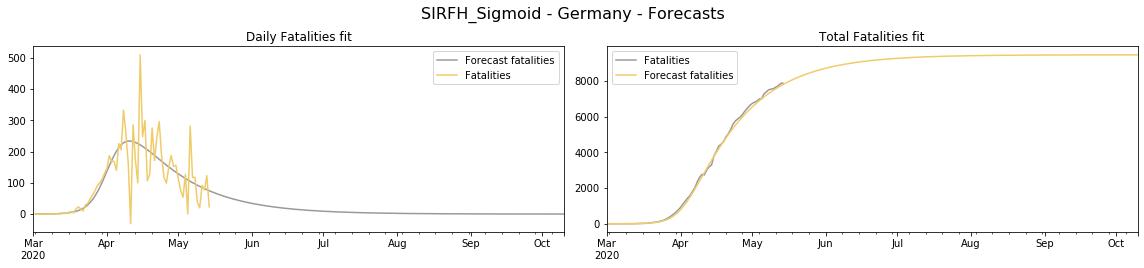

time: 1 s


In [26]:
t1.plot_main_forecasts(figsize=midfigsize)

[0.007075087727564023, 0.012075087727564023, 0.017075087727564022]


True

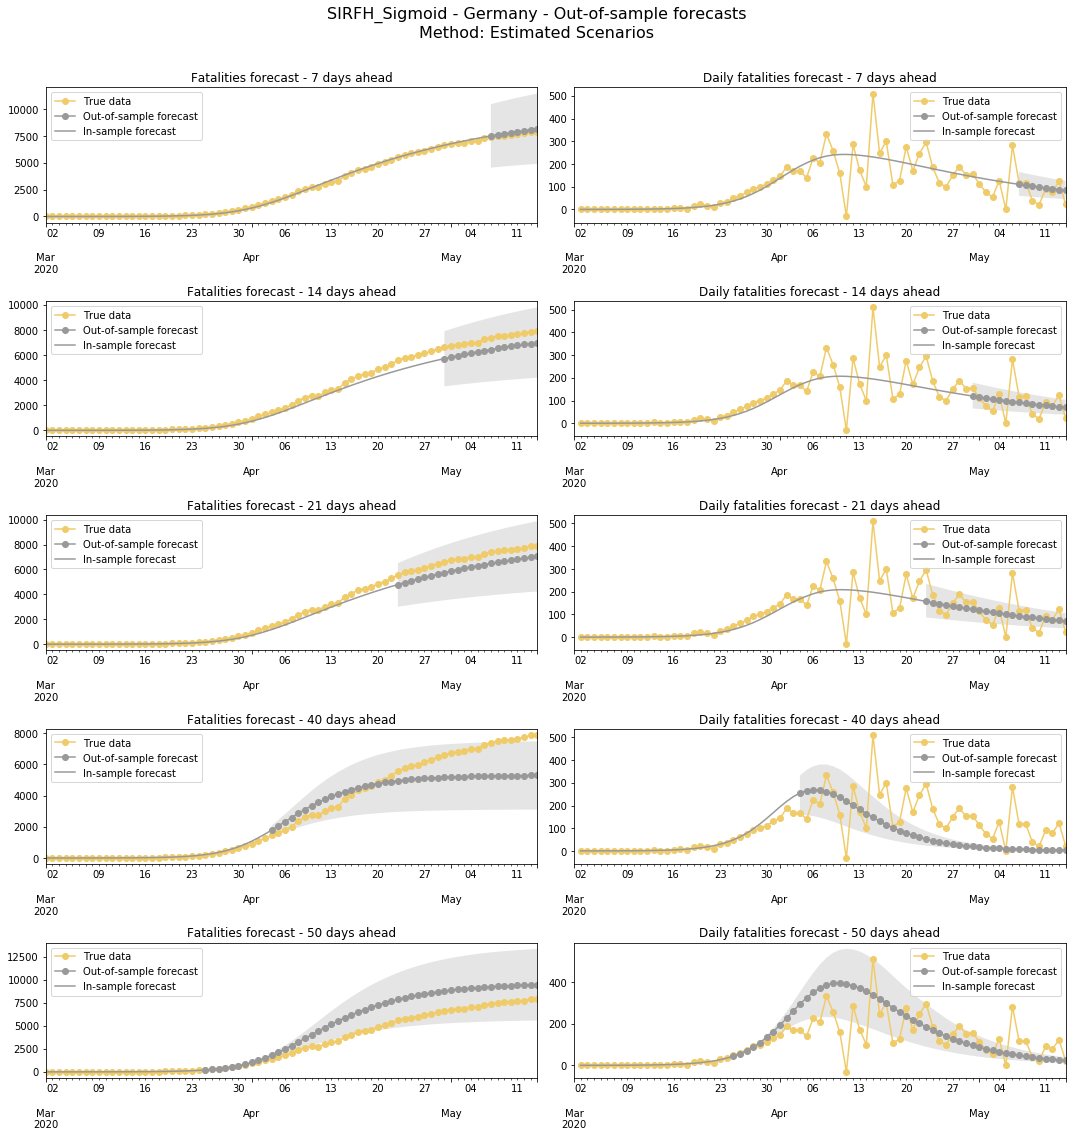

time: 33.8 s


In [27]:
#t1.outOfSample_forecast_scenarios(days=[7, 14, 21], scenarios='estimate')
t1.outOfSample_forecast_scenarios(days=[7, 14, 21, 40, 50], scenarios='estimate', figsize=(15,15))

[0.007075087727564023, 0.012075087727564023, 0.017075087727564022]


True

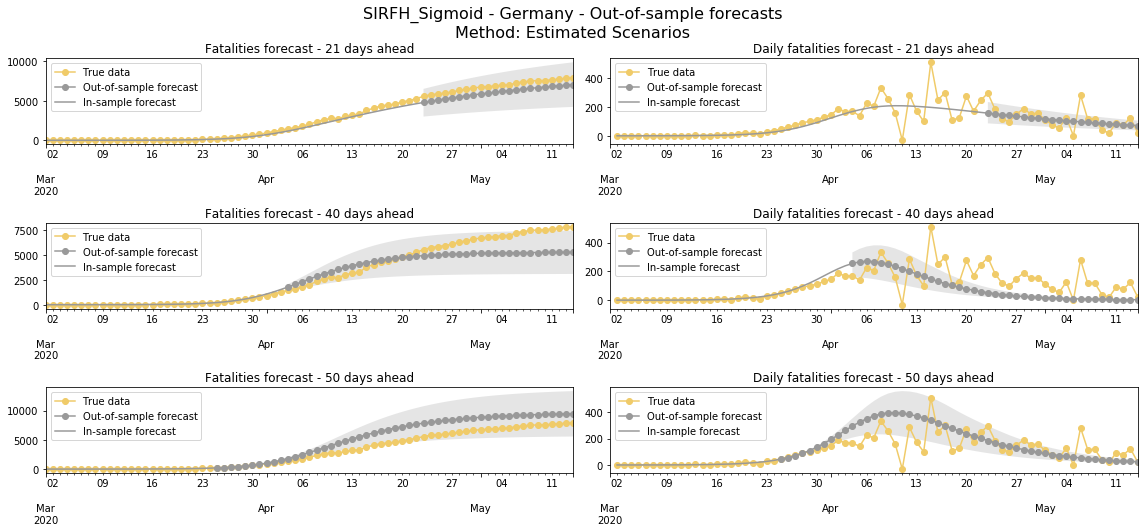

time: 21.9 s


In [28]:
t1.outOfSample_forecast_scenarios(days=[21, 40, 50,], scenarios='estimate', figsize=bigfigsize)

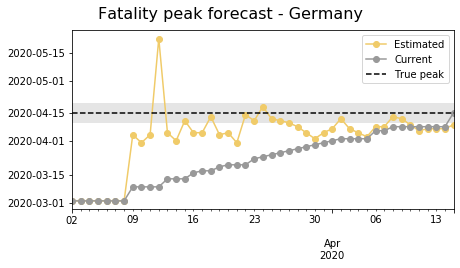

time: 3min 2s


In [29]:
roll = t1.rolling_peak(figsize=smallfigsize)

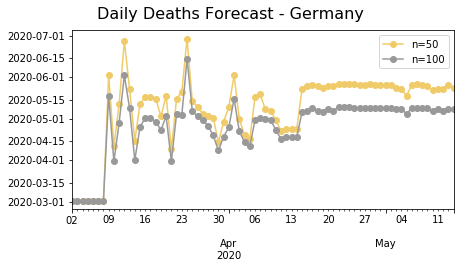

time: 2min 59s


In [44]:
nd = t1.rolling_n_fatal(figsize=smallfigsize)

## United States

S0p: 0.018915891450741375
gamma_i: 0.07142857578457373
gamma_h: 0.021978022287793064
omega: 0.1422560300217881
delta: 0.4787878787407952
lambda: 3.9999997764635102
beta1: 0.43101264824333063
beta2: 0.13082204890580246
S0: 6261087.034405449
R0:{'R0_initial': 6.000000889954765, 'R0_final': 1.8211354424508268}
gamma_i: 13.999999146223601 days
gamma_h: 45.49999935869642 days
omega: 7.029578991110878 days
{'S0p': (0.005, 0.02), 'gamma_i': (0.07142857142857142, 0.25), 'gamma_h': (0.02197802197802198, 0.05714285714285714), 'omega': (0.047619047619047616, 0.2), 'delta': (0, 0.47878787878787876), 'lambda': (0.25, 4), 'beta1': (0.05, 0.5), 'beta2': (0.05, 0.5)}

I Max:
1111867.9725767989
Est:
166780.19588651982
H Max:
70722.04134457356
R Max:
4900369.845186678
F Max:
120388.61055150602
F+R Max:
5020758.455738184


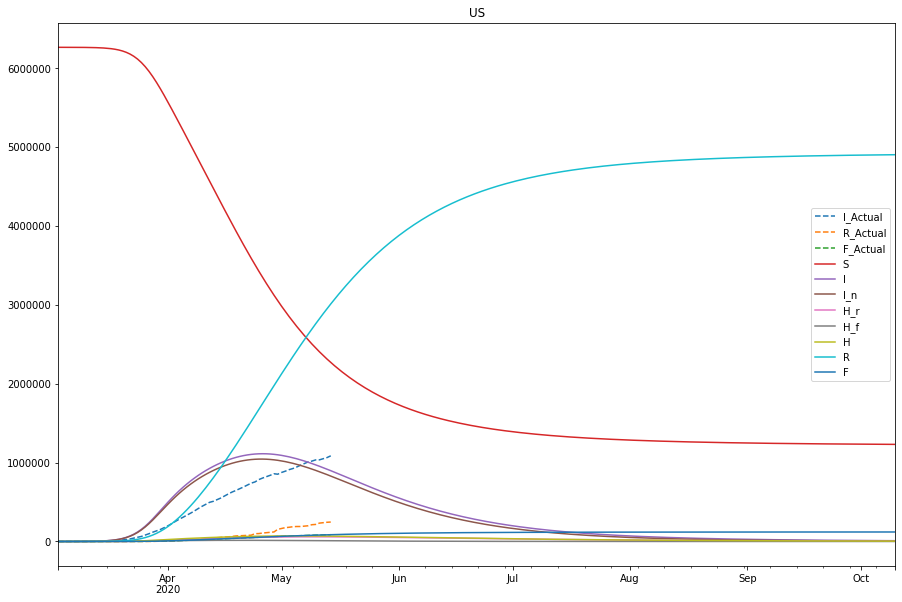

time: 6.99 s


In [45]:
hospRate = 0.05
deltaUpperBound = 79/165

t1 = SIRFH_Sigmoid(country = 'US',
         #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.000,.000,.9998],
         #adjust_recovered = False,
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .02,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             #'lambda': 0.5,
             
             
         },
                   
         parameter_bounds = {
             'S0p': (.005, .02),
         #    'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6.5*7), 1/(2.5*7)),
             'omega': (1/(21), 1/(5)),
         #    'lambda': (.5,2)
             
         },
         
         constraints_bounds = {
             'R0': (1,6),
         },
                   
         cut_sample_date = cut_sample_date
                   
         )

#t1.train_S0()
t1.train()
#t1.train_S0_joint()

#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}
print(t1.parameter_bounds)

print('\nI Max:')
print(t1.df.I.max())
print('Est:')
print(t1.df.I.max()*.15)
print('H Max:')
print(t1.df['H'].max())
print('R Max:')
print(t1.df['R'].max())
print('F Max:')
print(t1.df['F'].max())
print('F+R Max:')
print(t1.df['F'].max()+t1.df['R'].max())

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.main_plot()

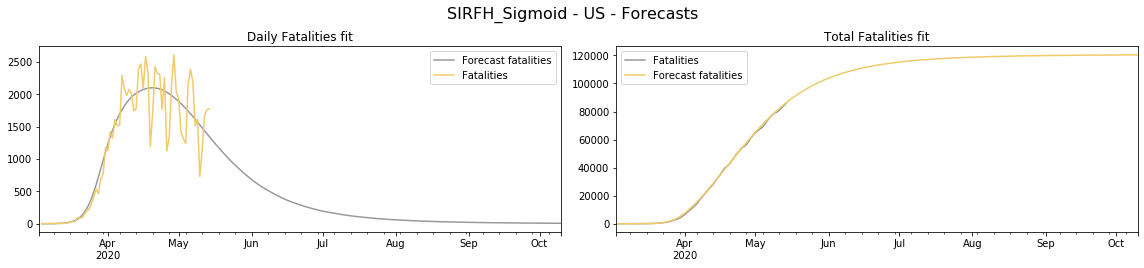

time: 1.03 s


In [32]:
t1.plot_main_forecasts(figsize=midfigsize)

[0.013915891450741374, 0.018915891450741375, 0.023915891450741376]


True

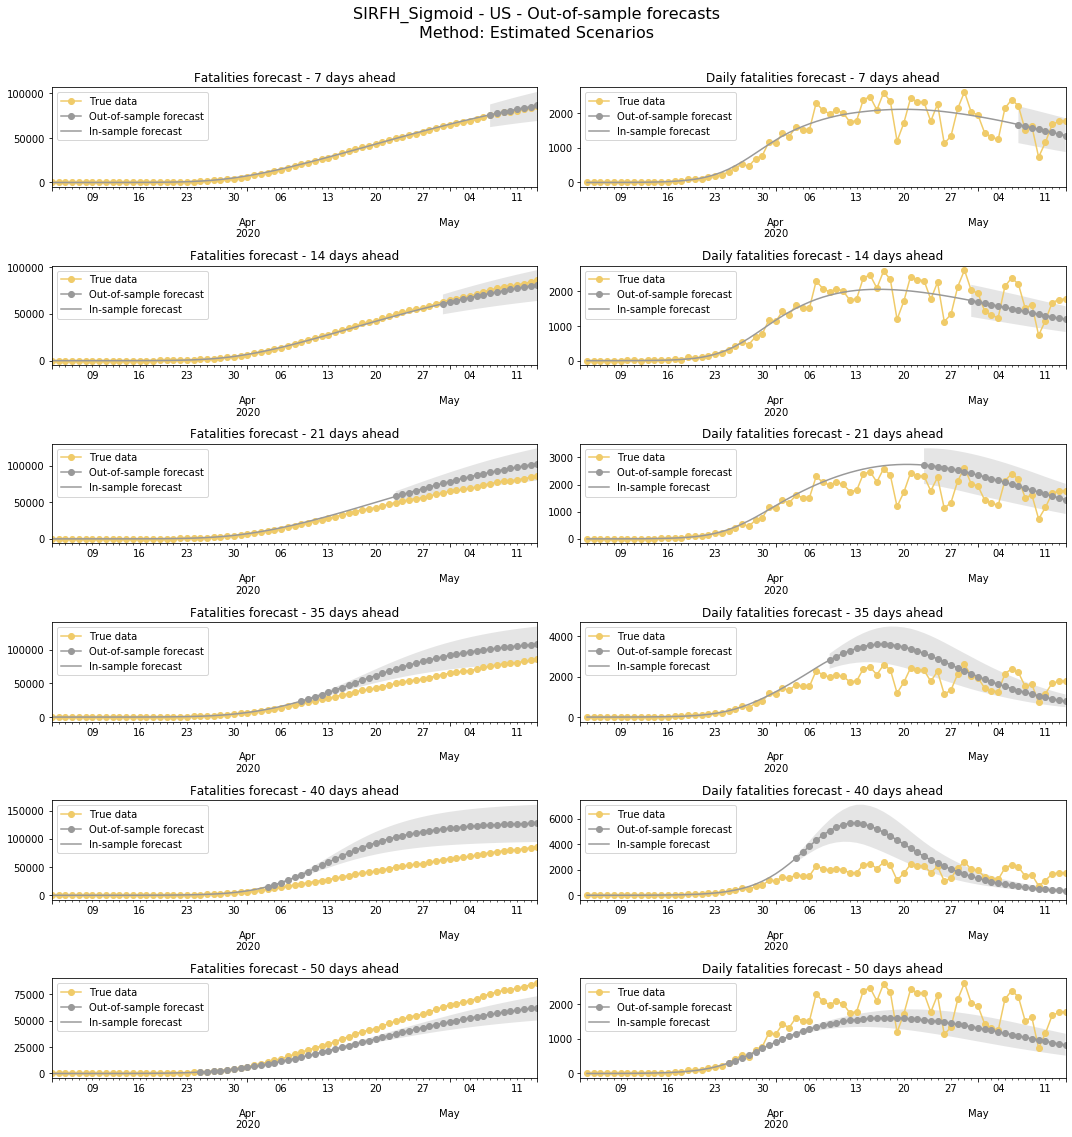

time: 51.1 s


In [33]:
#t1.outOfSample_forecast_scenarios(days=[7, 14, 21], scenarios='estimate')
t1.outOfSample_forecast_scenarios(days=[7, 14, 21, 35, 40, 50], scenarios='estimate', figsize=(15,15))

[0.013915891450741374, 0.018915891450741375, 0.023915891450741376]


True

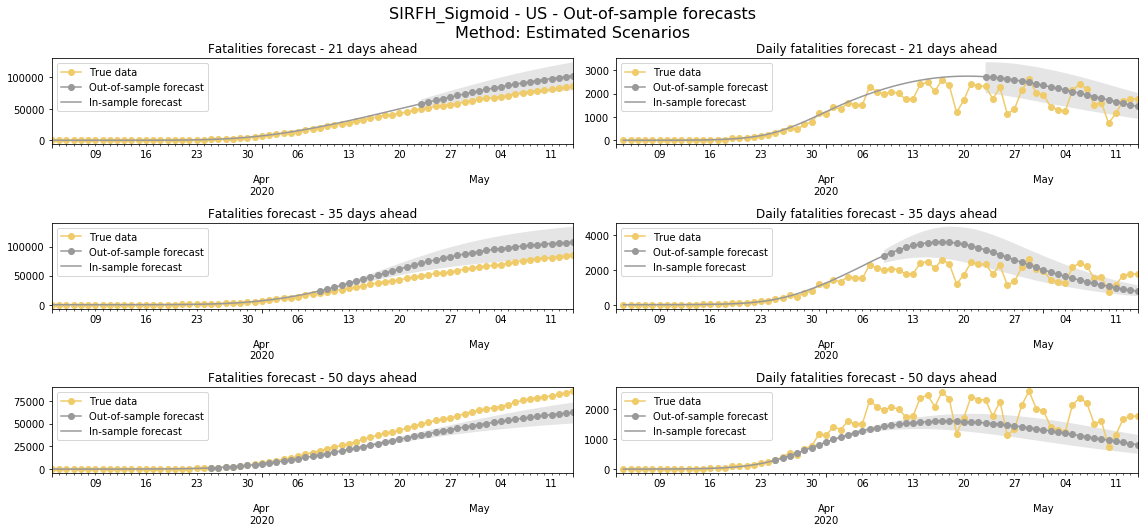

time: 27.2 s


In [34]:
t1.outOfSample_forecast_scenarios(days=[21, 35, 50,], scenarios='estimate', figsize=bigfigsize)

C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']


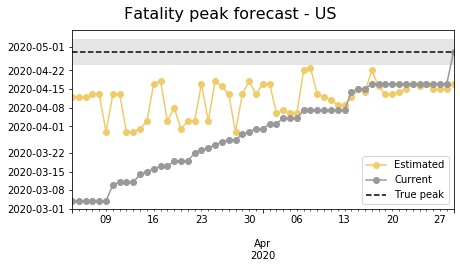

time: 3min 44s


In [35]:
roll = t1.rolling_peak(figsize=smallfigsize)

C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']


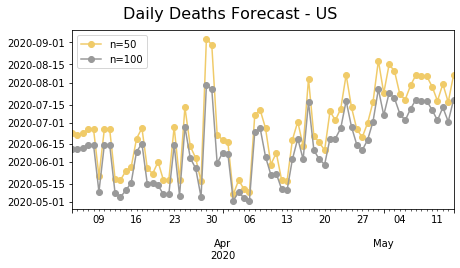

time: 3min 35s


In [46]:
nd = t1.rolling_n_fatal(figsize=smallfigsize)

# Brazil

S0p: 0.019998082696976383
gamma_i: 0.0714285714285743
gamma_h: 0.021978105406295096
omega: 0.16311433848175794
delta: 0.29317972663832675
lambda: 1.1700892273636954
beta1: 0.37332270787772037
beta2: 0.14899103071852104
S0: 4250622.29640931
R0:{'R0_initial': 5.256218322527401, 'R0_final': 2.0977277005379555}
gamma_i: 13.999999999999437 days
gamma_h: 45.499827283273206 days
omega: 6.130668887283849 days
{'S0p': (0.005, 0.02), 'gamma_i': (0.07142857142857142, 0.25), 'gamma_h': (0.02197802197802198, 0.05714285714285714), 'omega': (0.047619047619047616, 0.2), 'delta': (0, 0.47878787878787876), 'lambda': (0.25, 4), 'beta1': (0.05, 0.5), 'beta2': (0.05, 0.5)}

I Max:
773415.0995018005
Est:
116012.26492527006
H Max:
60927.838557017705
R Max:
3535145.2074279096
F Max:
52804.78008358166
F+R Max:
3587949.9875114914


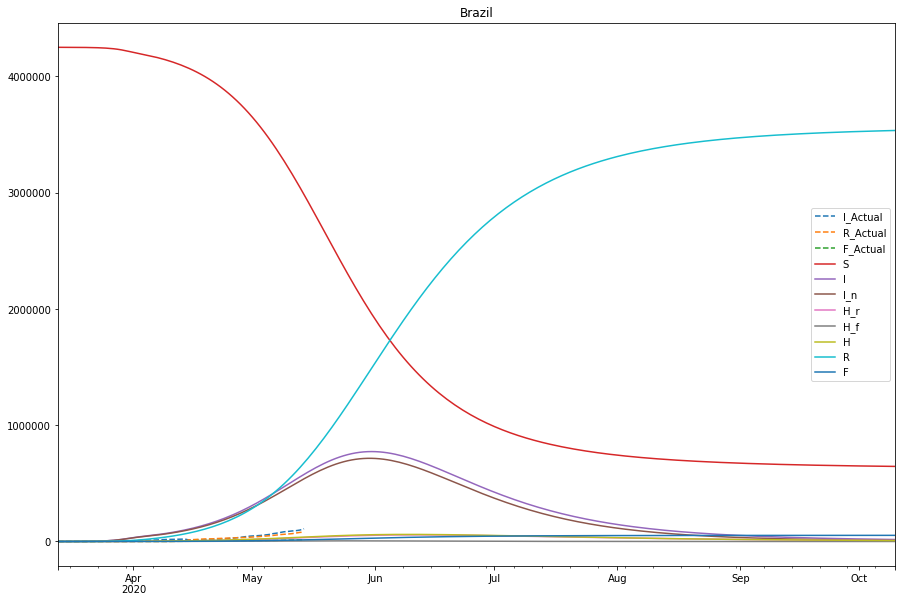

time: 3.46 s


In [2]:
hospRate = 0.05
deltaUpperBound = 79/165
cutDate = dt.datetime(2020,4,20)

t1 = SIRFH_Sigmoid(country = 'Brazil',
         #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.000,.000,.9998],
         #cut_sample_date = 7,
         #adjust_recovered = False,
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .02,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             #'lambda': 0.5,
             
             
         },
                   
         parameter_bounds = {
             'S0p': (.005, .02),
         #    'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6.5*7), 1/(2.5*7)),
             'omega': (1/(21), 1/(5)),
         #    'lambda': (.5,2)
             
         },
         
         constraints_bounds = {
             'R0': (1,6),
         },
                   
         cut_sample_date = cut_sample_date
                   
         )

#t1.train_S0()
t1.train()
#t1.train_S0_joint()

#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}
print(t1.parameter_bounds)

print('\nI Max:')
print(t1.df.I.max())
print('Est:')
print(t1.df.I.max()*.15)
print('H Max:')
print(t1.df['H'].max())
print('R Max:')
print(t1.df['R'].max())
print('F Max:')
print(t1.df['F'].max())
print('F+R Max:')
print(t1.df['F'].max()+t1.df['R'].max())

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.main_plot()

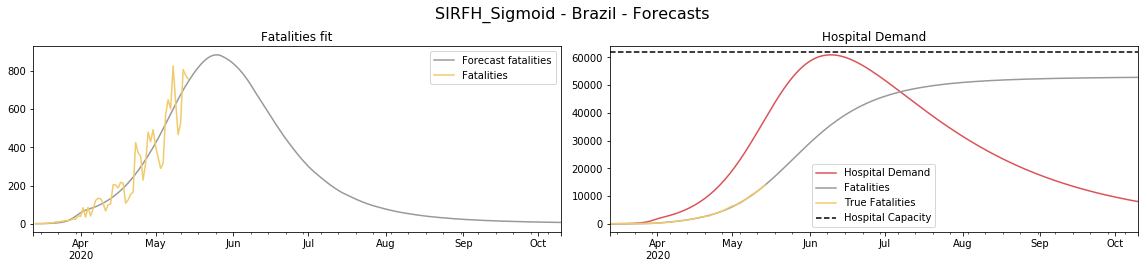

time: 1.07 s


In [3]:
t1.plot_main_forecasts_hospital(hospital_line=True, figsize=midfigsize)

[0.014998082696976382, 0.019998082696976383, 0.024998082696976384]


True

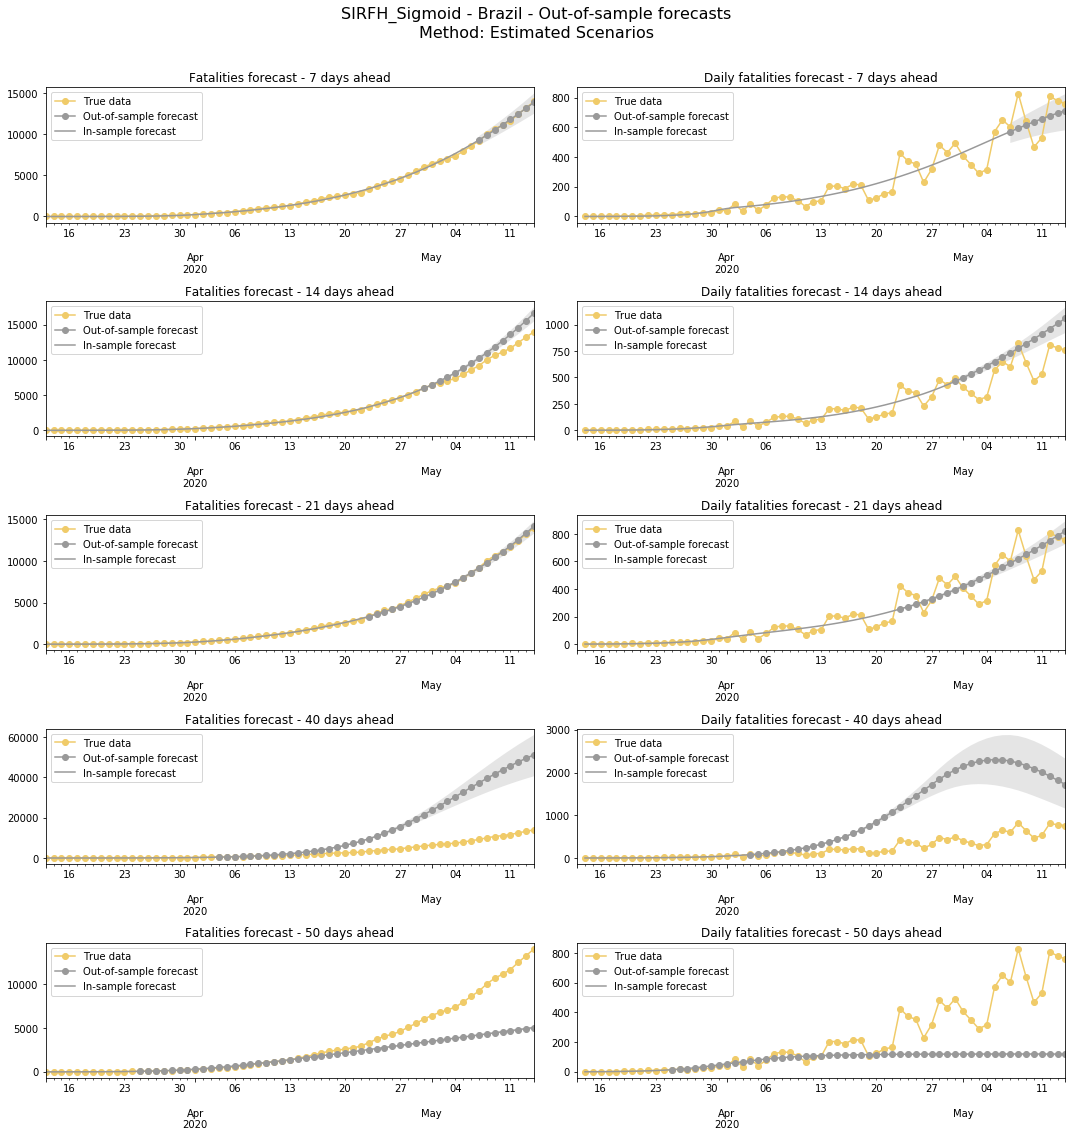

time: 36.9 s


In [39]:
#t1.outOfSample_forecast_scenarios(days=[0, 7, 14, 21], scenarios='estimate', verbose=False)
t1.outOfSample_forecast_scenarios(days=[7, 14, 21, 40, 50], scenarios='estimate', figsize=(15,15))

C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']


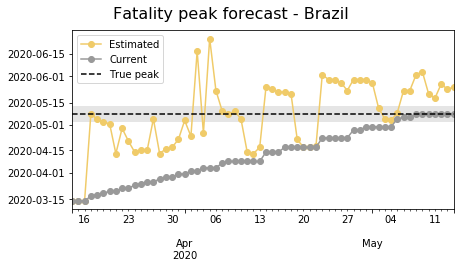

time: 2min 45s


In [40]:
roll = t1.rolling_peak(figsize=smallfigsize)

C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']


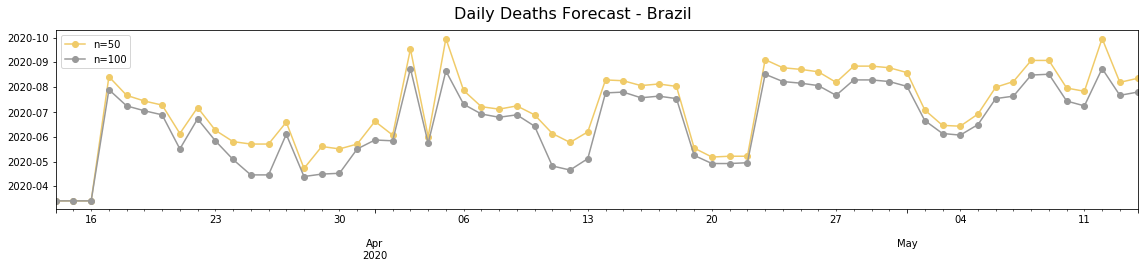

time: 2min 43s


In [41]:
nd = t1.rolling_n_fatal(figsize=midfigsize)

[0.014998082696976382, 0.019998082696976383, 0.024998082696976384]


C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']
C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1488: RuntimeWarning: overflow encountered in exp
  self.model_params['beta2']) / (1 + np.exp(t / self.model_params['lambda'])) + self.model_params['beta2']


True

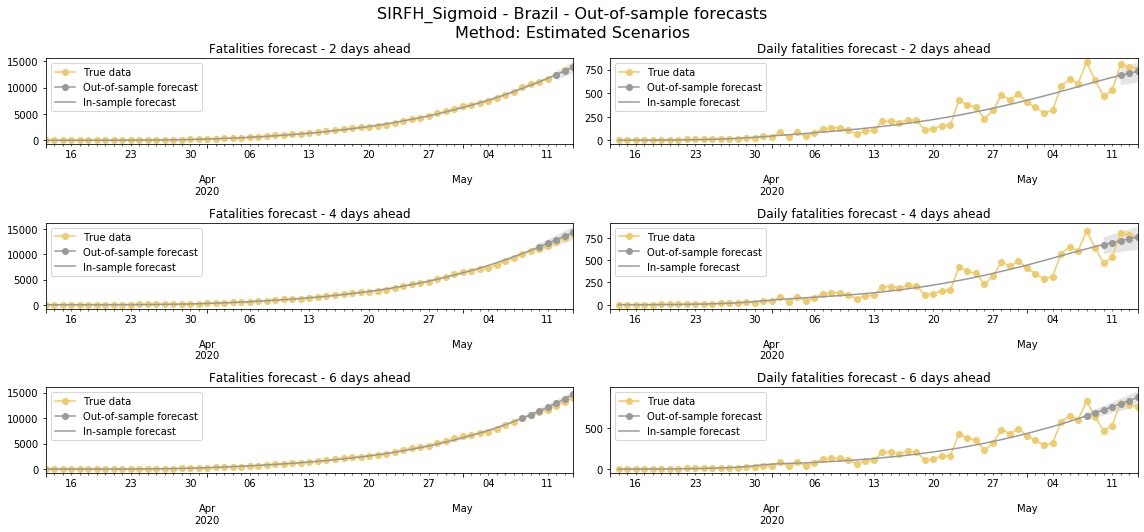

time: 28 s


In [4]:
#t1.outOfSample_forecast_scenarios(days=[0, 7, 14, 21], scenarios='estimate', verbose=False)
t1.outOfSample_forecast_scenarios(days=[2,4,6], scenarios='estimate', figsize=bigfigsize)